In [40]:
# 1. LOAD THE DATASET
import pandas as pd
df = pd.read_csv("tweets.csv" , encoding='Latin-1' , nrows=30)
print(df.shape)


(30, 16)


In [41]:
# 2. IMPORT LANGUAGE MODEL
import spacy 
nlp= spacy.load('en_core_web_sm')
tweets = ' '.join(df.text)
doc = nlp(tweets)
print(doc)

RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp; RT @Hemant_80: Did you vote on #Demonetization on Modi survey app? RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.

If not for Aam Aadmi, listen to th RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9 RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F @DerekScissors1: Indias #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That's how terrorists have RT @Joydeep_911: Calling all Nationalists to join...
Walk for #CorruptionFreeIndia and spread the benefits of #Demonetization among 

In [42]:
# 3. FUNCTION TO GENERATE WORD FREQUENCY
def gen_freq(tok):
    word_freq = pd.Series([i.text for i in tok]).value_counts()
    return word_freq

In [47]:
# 4. TEXT CLEANING
import re
cleaned = re.sub('RT|\#|\?','',tweets)  #............RT and hashes
cleaned = re.sub('@[a-zA-Z0-9_]+','',cleaned) #..........@usernames
cleaned = re.sub('https?://[^\s]+','',cleaned)#............https://t.co/9NheK63TPg
cleaned = re.sub(r'<ed>|<U\+[A-Za-z0-9]+>','',cleaned)     #..................... <ed><U+00A0><U+00BD><ed><U+00B1><U+0089>
cleaned = re.sub('[^\w\s]','',cleaned)
#print("\nCleaned text: \n",cleaned)
doc = nlp(cleaned)

tok = [i for i in doc if (not i.is_stop) and (not i.is_punct)]
word_freq = gen_freq(tok)
print(word_freq)

Demonetization    22
                 16
                  15
                   8
\r\n\r\n           7
                  ..
terrorists         1
s                  1
incident           1
JampK              1
Disaster           1
Name: count, Length: 152, dtype: int64


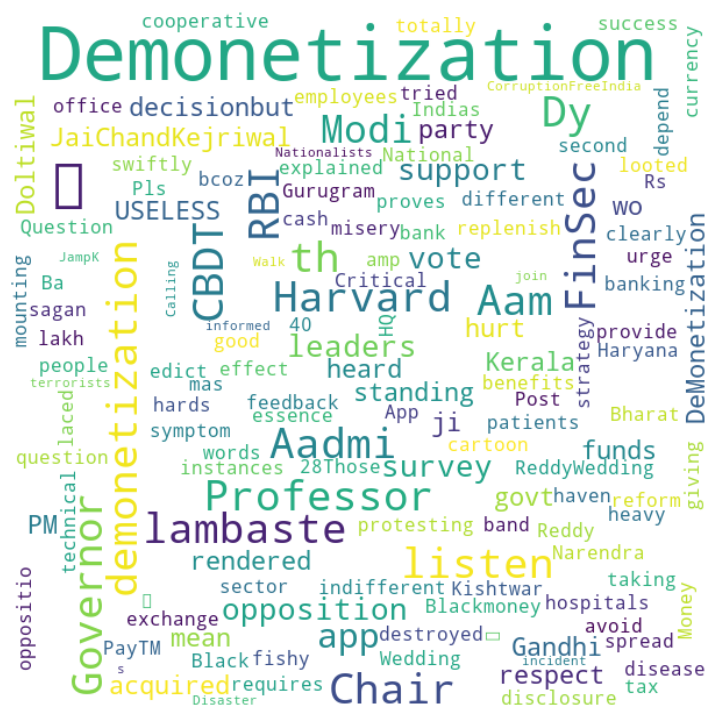


Number of unique words: 
 148


In [53]:
 # 5. GENERATING WORDCLOUD
 import matplotlib.pyplot as PT
 from wordcloud import WordCloud as WC
 
 #function to generate wordcloud
 def gen_wordcloud(data):
     data = data[data.index.str.contains('\n')==False]
     cloud = WC(width=600, height=600 ,max_words=200, background_color='white')
     cloud = cloud.generate_from_frequencies(data)
     PT.figure(figsize=(9,12))
     PT.imshow(cloud,interpolation = "bilinear")
     PT.axis('off')
     PT.show()
     print("\nNumber of unique words: \n",len(data))
gen_wordcloud(word_freq)
     